In [133]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
# Load the dataset into a pandas DataFrame, specifying 'num_code' as string type to avoid DtypeWarning
df = pd.read_csv('business.csv', dtype={'num_code': str})

In [135]:
# Display the first 5 rows of the DataFrame
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [136]:
# Display information about the DataFrame, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97467 entries, 0 to 97466
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        97467 non-null  object
 1   airline     97467 non-null  object
 2   ch_code     97467 non-null  object
 3   num_code    97467 non-null  object
 4   dep_time    97466 non-null  object
 5   from        97466 non-null  object
 6   time_taken  97466 non-null  object
 7   stop        97466 non-null  object
 8   arr_time    97466 non-null  object
 9   to          97466 non-null  object
 10  price       97466 non-null  object
dtypes: object(11)
memory usage: 8.2+ MB


In [137]:
# Extract the day part from the 'date' column
df['date'].str.split('-').str[0]

,date
0,11
1,11
2,11
3,11
4,11
...,...
97462,31
97463,31
97464,31
97465,31


In [138]:
# Create new columns for 'Date', 'month', and 'year' by splitting the 'date' column
df['Date']=df['date'].str.split('-').str[0]
df['month']=df['date'].str.split('-').str[1]
df['year']=df['date'].str.split('-').str[2]

In [139]:
# Display the first 5 rows of the DataFrame to show the new date columns
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,month,year
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",11,02,2022
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",11,02,2022
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",11,02,2022
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",11,02,2022
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",11,02,2022


In [140]:
# Check for null values in the 'date' column
df['date'].isnull().sum()

np.int64(0)

In [141]:
# Display information about the DataFrame again after adding new date columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97467 entries, 0 to 97466
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        97467 non-null  object
 1   airline     97467 non-null  object
 2   ch_code     97467 non-null  object
 3   num_code    97467 non-null  object
 4   dep_time    97466 non-null  object
 5   from        97466 non-null  object
 6   time_taken  97466 non-null  object
 7   stop        97466 non-null  object
 8   arr_time    97466 non-null  object
 9   to          97466 non-null  object
 10  price       97466 non-null  object
 11  Date        97467 non-null  object
 12  month       97466 non-null  object
 13  year        97466 non-null  object
dtypes: object(14)
memory usage: 10.4+ MB


In [142]:
# Define a function to clean and safely convert a series to integer, handling errors
def clean_to_int(series):
    return (
        series.astype(str)                # make sure it's string
        .str.strip()                      # remove spaces/tabs/newlines
        .str.replace('"', '', regex=False) # remove quotes
        .str.replace('\t', '', regex=False) # remove tabs
        .pipe(pd.to_numeric, errors='coerce') # convert to numbers, bad values -> NaN
        .astype('Int64')                  # keep integer type with NaN support
    )

# Apply the cleaning function to 'Date', 'month', and 'year' columns and convert to Int64
df['Date'] = clean_to_int(df['Date'])
df['month'] = clean_to_int(df['month'])
df['year'] = clean_to_int(df['year'])

In [143]:
# Display information about the DataFrame after converting date columns to Int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97467 entries, 0 to 97466
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        97467 non-null  object
 1   airline     97467 non-null  object
 2   ch_code     97467 non-null  object
 3   num_code    97467 non-null  object
 4   dep_time    97466 non-null  object
 5   from        97466 non-null  object
 6   time_taken  97466 non-null  object
 7   stop        97466 non-null  object
 8   arr_time    97466 non-null  object
 9   to          97466 non-null  object
 10  price       97466 non-null  object
 11  Date        97466 non-null  Int64 
 12  month       97466 non-null  Int64 
 13  year        97466 non-null  Int64 
dtypes: Int64(3), object(11)
memory usage: 10.7+ MB


In [144]:
# Drop rows with any null values
df.dropna(inplace=True)

In [145]:
# Check for null values in the 'Date' column after dropping rows with nulls
df[df['Date'].isnull()]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,month,year


In [146]:
# Drop the original 'date' column
df.drop('date',axis=1,inplace=True)

In [147]:
# Display the first 5 rows of the DataFrame after dropping the 'date' column
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,month,year
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",11,2,2022
1,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",11,2,2022
2,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",11,2,2022
3,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",11,2,2022
4,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",11,2,2022


In [148]:
# Extract the hours part from the 'arr_time' column
df['arr_time'].str.split(':').str[0]

,arr_time
0,20
1,21
2,20
3,23
4,23
...,...
97462,19
97463,22
97464,20
97465,17


In [149]:
# Create new columns for 'arr_hours' and 'arr_minutes' by splitting the 'arr_time' column
df['arr_hours']=df['arr_time'].str.split(':').str[0]
df['arr_minutes']=df['arr_time'].str.split(':').str[1]

In [150]:
# Display the first 5 rows of the DataFrame to show the new arrival time columns
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,month,year,arr_hours,arr_minutes
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",11,2,2022,20,00
1,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",11,2,2022,21,15
2,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",11,2,2022,20,45
3,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",11,2,2022,23,55
4,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",11,2,2022,23,55


In [151]:
# Display information about the DataFrame after adding new arrival time columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      97466 non-null  object
 1   ch_code      97466 non-null  object
 2   num_code     97466 non-null  object
 3   dep_time     97466 non-null  object
 4   from         97466 non-null  object
 5   time_taken   97466 non-null  object
 6   stop         97466 non-null  object
 7   arr_time     97466 non-null  object
 8   to           97466 non-null  object
 9   price        97466 non-null  object
 10  Date         97466 non-null  Int64 
 11  month        97466 non-null  Int64 
 12  year         97466 non-null  Int64 
 13  arr_hours    97466 non-null  object
 14  arr_minutes  97466 non-null  object
dtypes: Int64(3), object(12)
memory usage: 14.2+ MB


In [152]:
# Convert 'arr_hours' and 'arr_minutes' columns to integer type
df['arr_hours']=df['arr_hours'].astype(int)
df['arr_minutes']=df['arr_minutes'].astype(int)

In [153]:
# Display information about the DataFrame after converting arrival time columns to int
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      97466 non-null  object
 1   ch_code      97466 non-null  object
 2   num_code     97466 non-null  object
 3   dep_time     97466 non-null  object
 4   from         97466 non-null  object
 5   time_taken   97466 non-null  object
 6   stop         97466 non-null  object
 7   arr_time     97466 non-null  object
 8   to           97466 non-null  object
 9   price        97466 non-null  object
 10  Date         97466 non-null  Int64 
 11  month        97466 non-null  Int64 
 12  year         97466 non-null  Int64 
 13  arr_hours    97466 non-null  int64 
 14  arr_minutes  97466 non-null  int64 
dtypes: Int64(3), int64(2), object(10)
memory usage: 14.2+ MB


In [154]:
# Drop the original 'arr_time' column
df.drop('arr_time',axis=1,inplace=True)

In [155]:
# Display the first 5 rows of the DataFrame after dropping the 'arr_time' column
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,to,price,Date,month,year,arr_hours,arr_minutes
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,Mumbai,"25,612",11,2,2022,20,0
1,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,Mumbai,"25,612",11,2,2022,21,15
2,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,45
3,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,23,55
4,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,23,55


In [156]:
# Create new columns for 'dep_hours' and 'dep_minutes' by splitting the 'dep_time' column
df['dep_hours']=df['dep_time'].str.split(':').str[0]
df['dep_minutes']=df['dep_time'].str.split(':').str[1]

In [157]:
# Display the first 5 rows of the DataFrame to show the new departure time columns
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,to,price,Date,month,year,arr_hours,arr_minutes,dep_hours,dep_minutes
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,Mumbai,"25,612",11,2,2022,20,0,18,00
1,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,Mumbai,"25,612",11,2,2022,21,15,19,00
2,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,45,20,00
3,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,23,55,21,25
4,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,23,55,17,15


In [158]:
# Display information about the DataFrame after adding new departure time columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      97466 non-null  object
 1   ch_code      97466 non-null  object
 2   num_code     97466 non-null  object
 3   dep_time     97466 non-null  object
 4   from         97466 non-null  object
 5   time_taken   97466 non-null  object
 6   stop         97466 non-null  object
 7   to           97466 non-null  object
 8   price        97466 non-null  object
 9   Date         97466 non-null  Int64 
 10  month        97466 non-null  Int64 
 11  year         97466 non-null  Int64 
 12  arr_hours    97466 non-null  int64 
 13  arr_minutes  97466 non-null  int64 
 14  dep_hours    97466 non-null  object
 15  dep_minutes  97466 non-null  object
dtypes: Int64(3), int64(2), object(11)
memory usage: 14.9+ MB


In [159]:
# Convert 'dep_hours' and 'dep_minutes' columns to integer type
df['dep_hours']=df['dep_hours'].astype(int)
df['dep_minutes']=df['dep_minutes'].astype(int)

In [160]:
# Display information about the DataFrame after converting departure time columns to int
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      97466 non-null  object
 1   ch_code      97466 non-null  object
 2   num_code     97466 non-null  object
 3   dep_time     97466 non-null  object
 4   from         97466 non-null  object
 5   time_taken   97466 non-null  object
 6   stop         97466 non-null  object
 7   to           97466 non-null  object
 8   price        97466 non-null  object
 9   Date         97466 non-null  Int64 
 10  month        97466 non-null  Int64 
 11  year         97466 non-null  Int64 
 12  arr_hours    97466 non-null  int64 
 13  arr_minutes  97466 non-null  int64 
 14  dep_hours    97466 non-null  int64 
 15  dep_minutes  97466 non-null  int64 
dtypes: Int64(3), int64(4), object(9)
memory usage: 14.9+ MB


In [161]:
# Drop the original 'dep_time' column
df.drop('dep_time',axis=1,inplace=True)

In [162]:
# Display the first 5 rows of the DataFrame after dropping the 'dep_time' column
df.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,Date,month,year,arr_hours,arr_minutes,dep_hours,dep_minutes
0,Air India,AI,868,Delhi,02h 00m,non-stop,Mumbai,"25,612",11,2,2022,20,0,18,0
1,Air India,AI,624,Delhi,02h 15m,non-stop,Mumbai,"25,612",11,2,2022,21,15,19,0
2,Air India,AI,531,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,45,20,0
3,Air India,AI,839,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,23,55,21,25
4,Air India,AI,544,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,23,55,17,15


In [163]:
# Create new columns for 'time_hours' and 'time_minutes' by splitting the 'time_taken' column
df['time_hours']=df['time_taken'].str.split(' ').str[0].str.split('h').str[0]
df['time_minutes']=df['time_taken'].str.split(' ').str[1].str.split('m').str[0]

In [164]:
# Display the first 5 rows of the DataFrame to show the new time taken columns
df.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,Date,month,year,arr_hours,arr_minutes,dep_hours,dep_minutes,time_hours,time_minutes
0,Air India,AI,868,Delhi,02h 00m,non-stop,Mumbai,"25,612",11,2,2022,20,0,18,0,02,00
1,Air India,AI,624,Delhi,02h 15m,non-stop,Mumbai,"25,612",11,2,2022,21,15,19,0,02,15
2,Air India,AI,531,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,45,20,0,24,45
3,Air India,AI,839,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,23,55,21,25,26,30
4,Air India,AI,544,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,23,55,17,15,06,40


In [165]:
# Display information about the DataFrame after adding new time taken columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       97466 non-null  object
 1   ch_code       97466 non-null  object
 2   num_code      97466 non-null  object
 3   from          97466 non-null  object
 4   time_taken    97466 non-null  object
 5   stop          97466 non-null  object
 6   to            97466 non-null  object
 7   price         97466 non-null  object
 8   Date          97466 non-null  Int64 
 9   month         97466 non-null  Int64 
 10  year          97466 non-null  Int64 
 11  arr_hours     97466 non-null  int64 
 12  arr_minutes   97466 non-null  int64 
 13  dep_hours     97466 non-null  int64 
 14  dep_minutes   97466 non-null  int64 
 15  time_hours    97466 non-null  object
 16  time_minutes  97466 non-null  object
dtypes: Int64(3), int64(4), object(10)
memory usage: 15.7+ MB


In [166]:
# Convert 'time_hours' and 'time_minutes' columns to integer type
df['time_hours']=df['time_hours'].astype(int)
df['time_minutes']=df['time_minutes'].astype(int)

In [167]:
# Display information about the DataFrame after converting time taken columns to int
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       97466 non-null  object
 1   ch_code       97466 non-null  object
 2   num_code      97466 non-null  object
 3   from          97466 non-null  object
 4   time_taken    97466 non-null  object
 5   stop          97466 non-null  object
 6   to            97466 non-null  object
 7   price         97466 non-null  object
 8   Date          97466 non-null  Int64 
 9   month         97466 non-null  Int64 
 10  year          97466 non-null  Int64 
 11  arr_hours     97466 non-null  int64 
 12  arr_minutes   97466 non-null  int64 
 13  dep_hours     97466 non-null  int64 
 14  dep_minutes   97466 non-null  int64 
 15  time_hours    97466 non-null  int64 
 16  time_minutes  97466 non-null  int64 
dtypes: Int64(3), int64(6), object(8)
memory usage: 15.7+ MB


In [168]:
# Drop the original 'time_taken' column
df.drop('time_taken',axis=1,inplace=True)

In [169]:
# Display the first 5 rows of the DataFrame after dropping the 'time_taken' column
df.head()

,airline,ch_code,num_code,from,stop,to,price,Date,month,year,arr_hours,arr_minutes,dep_hours,dep_minutes,time_hours,time_minutes
0,Air India,AI,868,Delhi,non-stop,Mumbai,"25,612",11,2,2022,20,0,18,0,2,0
1,Air India,AI,624,Delhi,non-stop,Mumbai,"25,612",11,2,2022,21,15,19,0,2,15
2,Air India,AI,531,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"42,220",11,2,2022,20,45,20,0,24,45
3,Air India,AI,839,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"44,450",11,2,2022,23,55,21,25,26,30
4,Air India,AI,544,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,"46,690",11,2,2022,23,55,17,15,6,40


In [170]:
# Display the unique values in the 'stop' column
df['stop'].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t

# Task
Clean the 'stop' column in the dataframe by removing newline characters and extra spaces, and create a new column representing the number of stops (0 for 'non-stop', 1 for '1-stop', and 2 for '2+-stop'), handling variations like '1-stop Via IDR'. Display the cleaned 'stop' column and the new 'number of stops' column.

## Clean the 'stop' column

### Subtask:
Remove newline characters and extra spaces from the 'stop' column.


**Reasoning**:
Clean the 'stop' column by removing newline characters and extra spaces.



In [171]:
# Clean the 'stop' column by removing newline characters and extra spaces
df['stop'] = df['stop'].str.replace(r'\n\s*', '', regex=True).str.strip()
display(df['stop'].unique())

array(['non-stop', '1-stop', '1-stopVia IDR', '1-stopVia IXU',
       '1-stopVia Chennai', '1-stopVia Lucknow', '1-stopVia STV',
       '1-stopVia Hyderabad', '1-stopVia GAY', '2+-stop',
       '1-stopVia Guwahati', '1-stopVia GAU', '1-stopVia VTZ',
       '1-stopVia NDC', '1-stopVia IXE', '1-stopVia Raipur',
       '1-stopVia PAT', '1-stopVia RPR', '1-stopVia Patna',
       '1-stopVia Kolkata', '1-stopVia HYD', '1-stopVia Delhi',
       '1-stopVia Bhubaneswar', '1-stopVia BBI', '1-stopVia Surat'],
      dtype=object)

## Extract the number of stops

### Subtask:
Create a new column that represents the number of stops (e.g., 0 for 'non-stop', 1 for '1-stop', and 2 for '2+-stop').


**Reasoning**:
Create the 'number_of_stops' column and populate it based on the cleaned 'stop' column.



In [172]:
# Create a new column 'number_of_stops' based on the cleaned 'stop' column
df['number_of_stops'] = 0
df.loc[df['stop'].str.contains('1-stop', na=False), 'number_of_stops'] = 1
df.loc[df['stop'].str.contains('2\\+-stop', na=False), 'number_of_stops'] = 2
display(df[['stop', 'number_of_stops']].head())

,stop,number_of_stops
0,non-stop,0
1,non-stop,0
2,1-stop,1
3,1-stop,1
4,1-stop,1


## Summary:

### Data Analysis Key Findings

*   The 'stop' column was successfully cleaned by removing newline characters and extra spaces.
*   A new column named 'number\_of\_stops' was created, where 'non-stop' is represented as 0, '1-stop' as 1, and '2+-stop' as 2.

### Insights or Next Steps

*   The cleaned 'stop' column and the new 'number\_of\_stops' column are now ready for further analysis or use in modeling.


In [173]:
# Display the first 5 rows of the DataFrame to show the new 'number_of_stops' column
df.head()

,airline,ch_code,num_code,from,stop,to,price,Date,month,year,arr_hours,arr_minutes,dep_hours,dep_minutes,time_hours,time_minutes,number_of_stops
0,Air India,AI,868,Delhi,non-stop,Mumbai,"25,612",11,2,2022,20,0,18,0,2,0,0
1,Air India,AI,624,Delhi,non-stop,Mumbai,"25,612",11,2,2022,21,15,19,0,2,15,0
2,Air India,AI,531,Delhi,1-stop,Mumbai,"42,220",11,2,2022,20,45,20,0,24,45,1
3,Air India,AI,839,Delhi,1-stop,Mumbai,"44,450",11,2,2022,23,55,21,25,26,30,1
4,Air India,AI,544,Delhi,1-stop,Mumbai,"46,690",11,2,2022,23,55,17,15,6,40,1


In [174]:
# Display information about the DataFrame after adding the 'number_of_stops' column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          97466 non-null  object
 1   ch_code          97466 non-null  object
 2   num_code         97466 non-null  object
 3   from             97466 non-null  object
 4   stop             97466 non-null  object
 5   to               97466 non-null  object
 6   price            97466 non-null  object
 7   Date             97466 non-null  Int64 
 8   month            97466 non-null  Int64 
 9   year             97466 non-null  Int64 
 10  arr_hours        97466 non-null  int64 
 11  arr_minutes      97466 non-null  int64 
 12  dep_hours        97466 non-null  int64 
 13  dep_minutes      97466 non-null  int64 
 14  time_hours       97466 non-null  int64 
 15  time_minutes     97466 non-null  int64 
 16  number_of_stops  97466 non-null  int64 
dtypes: Int64(3), int64(7), object(7)
mem

In [175]:
# Drop the original 'stop' column
df.drop('stop',axis=1,inplace=True)

In [176]:
# Display the first 5 rows of the DataFrame after dropping the 'stop' column
df.head()

,airline,ch_code,num_code,from,to,price,Date,month,year,arr_hours,arr_minutes,dep_hours,dep_minutes,time_hours,time_minutes,number_of_stops
0,Air India,AI,868,Delhi,Mumbai,"25,612",11,2,2022,20,0,18,0,2,0,0
1,Air India,AI,624,Delhi,Mumbai,"25,612",11,2,2022,21,15,19,0,2,15,0
2,Air India,AI,531,Delhi,Mumbai,"42,220",11,2,2022,20,45,20,0,24,45,1
3,Air India,AI,839,Delhi,Mumbai,"44,450",11,2,2022,23,55,21,25,26,30,1
4,Air India,AI,544,Delhi,Mumbai,"46,690",11,2,2022,23,55,17,15,6,40,1


In [177]:
# Check for null values in each column
df.isnull().sum()

,0
airline,0
ch_code,0
num_code,0
from,0
to,0
price,0
Date,0
month,0
year,0
arr_hours,0


In [178]:
# Display the unique values in the 'to' column
df['to'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [187]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          97466 non-null  object
 1   ch_code          97466 non-null  object
 2   num_code         97466 non-null  object
 3   from             97466 non-null  object
 4   to               97466 non-null  object
 5   price            97466 non-null  object
 6   Date             97466 non-null  Int64 
 7   month            97466 non-null  Int64 
 8   year             97466 non-null  Int64 
 9   arr_hours        97466 non-null  int64 
 10  arr_minutes      97466 non-null  int64 
 11  dep_hours        97466 non-null  int64 
 12  dep_minutes      97466 non-null  int64 
 13  time_hours       97466 non-null  int64 
 14  time_minutes     97466 non-null  int64 
 15  number_of_stops  97466 non-null  int64 
dtypes: Int64(3), int64(7), object(6)
memory usage: 14.9+ MB


In [188]:
# Remove commas from the 'price' column
df['price']=df['price'].str.replace(',','',regex=True).str.strip()

In [189]:
# Display the first 5 rows of the DataFrame after cleaning the 'price' column
df.head()

,airline,ch_code,num_code,from,to,price,Date,month,year,arr_hours,arr_minutes,dep_hours,dep_minutes,time_hours,time_minutes,number_of_stops
0,Air India,AI,868,Delhi,Mumbai,25612,11,2,2022,20,0,18,0,2,0,0
1,Air India,AI,624,Delhi,Mumbai,25612,11,2,2022,21,15,19,0,2,15,0
2,Air India,AI,531,Delhi,Mumbai,42220,11,2,2022,20,45,20,0,24,45,1
3,Air India,AI,839,Delhi,Mumbai,44450,11,2,2022,23,55,21,25,26,30,1
4,Air India,AI,544,Delhi,Mumbai,46690,11,2,2022,23,55,17,15,6,40,1


In [190]:
# Display information about the DataFrame after cleaning the 'price' column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          97466 non-null  object
 1   ch_code          97466 non-null  object
 2   num_code         97466 non-null  object
 3   from             97466 non-null  object
 4   to               97466 non-null  object
 5   price            97466 non-null  object
 6   Date             97466 non-null  Int64 
 7   month            97466 non-null  Int64 
 8   year             97466 non-null  Int64 
 9   arr_hours        97466 non-null  int64 
 10  arr_minutes      97466 non-null  int64 
 11  dep_hours        97466 non-null  int64 
 12  dep_minutes      97466 non-null  int64 
 13  time_hours       97466 non-null  int64 
 14  time_minutes     97466 non-null  int64 
 15  number_of_stops  97466 non-null  int64 
dtypes: Int64(3), int64(7), object(6)
memory usage: 14.9+ MB


# oneHotCoder

In [191]:
# Convert the 'price' column to integer type
df['price']=df['price'].astype(int)

In [192]:
# Display information about the DataFrame after converting 'price' to int
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97466 entries, 0 to 97466
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          97466 non-null  object
 1   ch_code          97466 non-null  object
 2   num_code         97466 non-null  object
 3   from             97466 non-null  object
 4   to               97466 non-null  object
 5   price            97466 non-null  int64 
 6   Date             97466 non-null  Int64 
 7   month            97466 non-null  Int64 
 8   year             97466 non-null  Int64 
 9   arr_hours        97466 non-null  int64 
 10  arr_minutes      97466 non-null  int64 
 11  dep_hours        97466 non-null  int64 
 12  dep_minutes      97466 non-null  int64 
 13  time_hours       97466 non-null  int64 
 14  time_minutes     97466 non-null  int64 
 15  number_of_stops  97466 non-null  int64 
dtypes: Int64(3), int64(8), object(5)
memory usage: 14.9+ MB


In [181]:
# Import the OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

In [182]:
# Initialize the OneHotEncoder
encoder=OneHotEncoder()

In [183]:
# Apply OneHotEncoder to 'airline', 'ch_code', 'from', and 'to' columns and display the result as a numpy array
encoder.fit_transform(df[['airline','ch_code','from','to']]).toarray()

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [184]:
# Apply OneHotEncoder to 'airline', 'ch_code', 'from', and 'to' columns and display the result as a DataFrame with feature names
pd.DataFrame(encoder.fit_transform(df[['airline','ch_code','from','to']]).toarray(),columns=encoder.get_feature_names_out())

,airline_Air India,airline_Vistara,ch_code_AI,ch_code_UK,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97461,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97462,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97463,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97464,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Exploratory Data Analysis

Let's visualize the distribution of the number of stops.

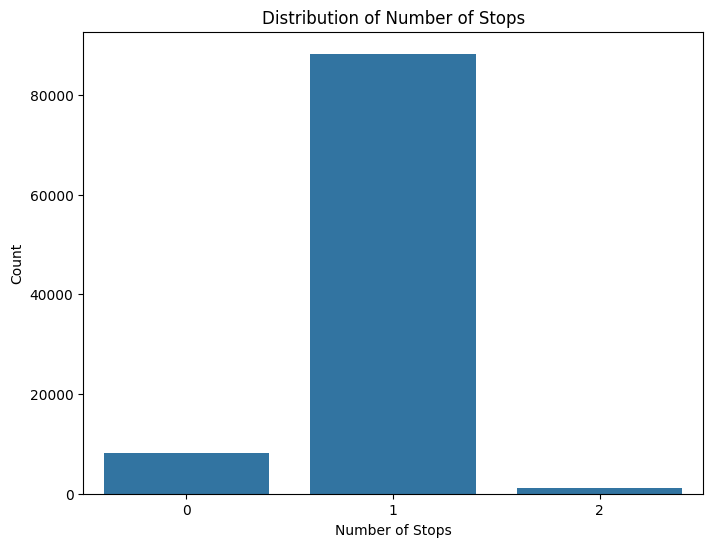

In [185]:
# Plot the distribution of the number of stops
plt.figure(figsize=(8, 6))
sns.countplot(x='number_of_stops', data=df)
plt.title('Distribution of Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.show()

Now, let's look at the distribution of airlines.

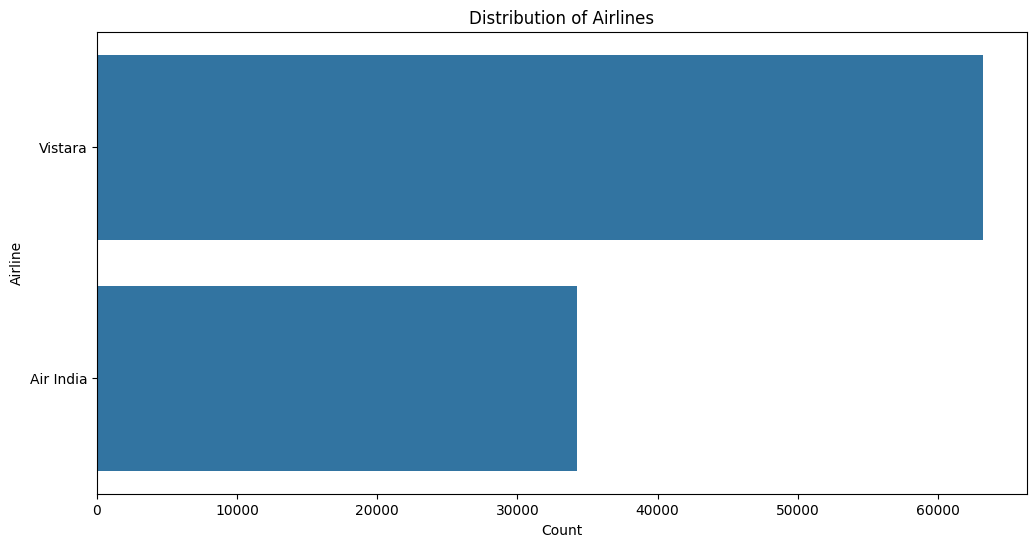

In [186]:
# Plot the distribution of airlines
plt.figure(figsize=(12, 6))
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index)
plt.title('Distribution of Airlines')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

Finally, let's visualize the distribution of prices.

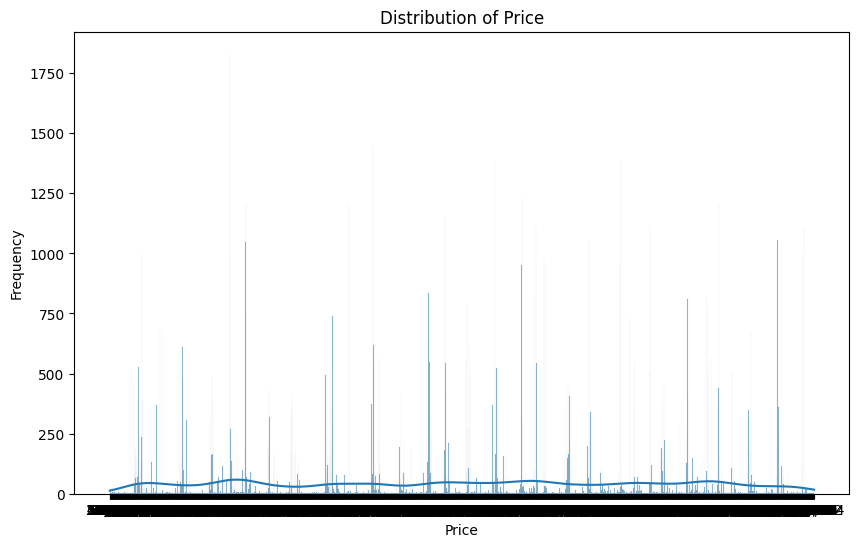

In [132]:
# Plot the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()